Referencing this tutorial:
https://blog.jovian.com/image-classification-between-dog-and-cat-using-resnet-in-pytorch-fdd9fdfac20a

https://www.kaggle.com/code/utshabkumarghosh/how-to-download-dataset-to-drive-in-colab

but attempt to write everything in own language.

# download cats dogs data from kaggle directly into gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cd /content/drive/MyDrive/Colab_Notebooks/pytorch_learning/datasets/

Take your Token from Kaggle. For this:¶
Go to My Account (Not My Profile)
Go to API Section and click on Create New API Token
Download the token, which will be saved as a .json file (e.g. kaggle.json)

In [ ]:
#Use this code to upload API Token downloaded from Kaggle:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"haidiazaman","key":"135cbd95c543e5772a6d465e60de6d9d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!rm kaggle.json

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/pytorch_learning/datasets

/content/drive/MyDrive/Colab_Notebooks/pytorch_learning


In [ ]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

 98% 801M/817M [00:06<00:00, 150MB/s]
100% 817M/817M [00:06<00:00, 125MB/s]


In [ ]:
from zipfile import ZipFile
file_name="/content/drive/MyDrive/Colab_Notebooks/pytorch_learning/dogs-vs-cats.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


# create folder and remove all the ._ hidden files

In [ ]:
import os

train_path="/content/drive/MyDrive/Colab_Notebooks/pytorch_learning/datasets/train/train"
print(len(os.listdir(train_path)))
os.listdir(train_path)[:6]

25000


['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg']

In [ ]:
# import shutil
# from tqdm import tqdm

# train_path="/Volumes/Extreme SSD/dogs-vs-cats/train"
# dest_folder="/Volumes/Extreme SSD/dogs-vs-cats/train_new"

# # create the destination folder if it doesn't already exist
# if not os.path.exists(dest_folder):
#     os.makedirs(dest_folder)
    
# for file in tqdm(os.listdir(train_path)):
#     if not file.startswith("._"):
#         full_file_path=os.path.join(train_path,file)
#         shutil.copy2(full_file_path,dest_folder)

100%|████████████████████████████████████| 50000/50000 [01:31<00:00, 547.01it/s]


# data visualisation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

img_path="/content/drive/MyDrive/Colab_Notebooks/pytorch_learning/datasets/train/train"
img_list=[os.path.join(img_path,x) for x in os.listdir(img_path)]
len(img_list),img_list[:6] #should be 25k

(24916,
 ['/content/drive/MyDrive/Colab_Notebooks/pytorch_learning/datasets/train/train/dog.9099.jpg',
  '/content/drive/MyDrive/Colab_Notebooks/pytorch_learning/datasets/train/train/dog.91.jpg',
  '/content/drive/MyDrive/Colab_Notebooks/pytorch_learning/datasets/train/train/dog.910.jpg',
  '/content/drive/MyDrive/Colab_Notebooks/pytorch_learning/datasets/train/train/dog.9100.jpg',
  '/content/drive/MyDrive/Colab_Notebooks/pytorch_learning/datasets/train/train/dog.9101.jpg',
  '/content/drive/MyDrive/Colab_Notebooks/pytorch_learning/datasets/train/train/dog.9102.jpg'])

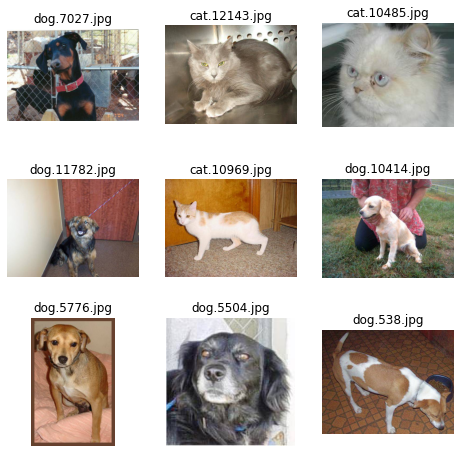

In [8]:
import torch
from PIL import Image
import matplotlib.pyplot as plt


figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(img_list), size=(1,)).item()
    img = Image.open(img_list[sample_idx])
    label = img_list[sample_idx].split("/")[-1]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img)
    
plt.show()

# custom dataset class

In [9]:
# write custom transforms required - include data augmentation techniques
# want to keep augmentations only to training data, validation data kept original
from torchvision import transforms

img_dim=224
def get_train_transform():
    train_transforms = transforms.Compose([
        transforms.Resize((img_dim,img_dim)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(90),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0,0,0),std=(1,1,1))
    ])
    return train_transforms

def get_val_test_transforms():
    val_transforms = transforms.Compose([
        transforms.Resize((img_dim,img_dim)),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0,0,0),std=(1,1,1))
    ])
    return val_transforms

def class_to_int(name):
    if name=="cat":
        return 0
    else:
        return 1

In [ ]:
len(img_list),img_list[:6]

(24930,
 ['/content/drive/MyDrive/Colab_Notebooks/pytorch_learning/datasets/train/train/cat.0.jpg',
  '/content/drive/MyDrive/Colab_Notebooks/pytorch_learning/datasets/train/train/cat.1.jpg',
  '/content/drive/MyDrive/Colab_Notebooks/pytorch_learning/datasets/train/train/cat.10.jpg',
  '/content/drive/MyDrive/Colab_Notebooks/pytorch_learning/datasets/train/train/cat.100.jpg',
  '/content/drive/MyDrive/Colab_Notebooks/pytorch_learning/datasets/train/train/cat.1000.jpg',
  '/content/drive/MyDrive/Colab_Notebooks/pytorch_learning/datasets/train/train/cat.10000.jpg'])

In [10]:
from sklearn.model_selection import train_test_split

print(len(img_list))
# 70-20-10 split for trg val test
train_paths,rest_paths=train_test_split(img_list,test_size=.3,shuffle=True,random_state=1)
print(len(train_paths),len(rest_paths))
val_paths,test_paths=train_test_split(rest_paths,test_size=1/3,shuffle=True,random_state=1)
print(len(train_paths),len(val_paths),len(test_paths))

24916
17441 7475
17441 4983 2492


In [11]:
# define th custom class for the retrival of images and labels
from torch.utils.data import Dataset
from PIL import Image

class CatsDogsDataset(Dataset):
    def __init__(self,img_paths,mode=None,train_transforms=None,val_test_transforms=None):
        self.img_paths=img_paths
        self.mode=mode
        self.train_transforms=train_transforms
        self.val_test_transforms=val_test_transforms
    
    def __len__(self):
        return len(self.img_paths)
    
    def __getitem__(self,index):
        index_img_path=self.img_paths[index]
        index_img=Image.open(index_img_path)
        index_label=class_to_int(index_img_path.split("/")[-1].split(".")[0])
        index_label=torch.tensor(index_label,dtype=torch.float32)
        if self.mode=="train":
            index_img=self.train_transforms(index_img)
        else:
            index_img=self.val_test_transforms(index_img)
        return index_img,index_label

17441


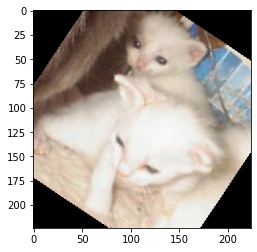

In [14]:
import numpy as np

train_dataset=CatsDogsDataset(train_paths,mode="train",train_transforms=get_train_transform())
print(train_dataset.__len__())

idx=100
sample_image=train_dataset.__getitem__(idx)[0]
plt.imshow(np.transpose(sample_image,(1,2,0)))
plt.show()

4983


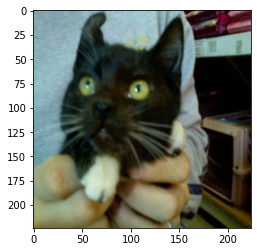

In [15]:
import numpy as np

val_dataset=CatsDogsDataset(val_paths,mode="val",val_test_transforms=get_val_test_transforms())
print(val_dataset.__len__())

idx=1000
sample_image=val_dataset.__getitem__(idx)[0]
plt.imshow(np.transpose(sample_image,(1,2,0)))
plt.show()

2492


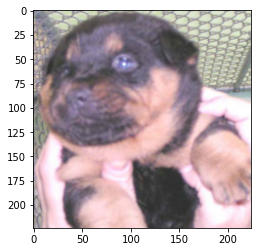

In [16]:
import numpy as np

test_dataset=CatsDogsDataset(test_paths,mode="test",val_test_transforms=get_val_test_transforms())
print(test_dataset.__len__())

idx=100
sample_image=test_dataset.__getitem__(idx)[0]
plt.imshow(np.transpose(sample_image,(1,2,0)))
plt.show()

In [17]:
from torch.utils.data import DataLoader

print(len(train_dataset),len(val_dataset),len(test_dataset))
batch_size=16
train_dataloader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True,drop_last=True)
val_dataloader=DataLoader(val_dataset,batch_size=batch_size,shuffle=True,drop_last=True)
test_dataloader=DataLoader(test_dataset,batch_size=batch_size,shuffle=True,drop_last=True)
print(len(train_dataloader),len(val_dataloader),len(test_dataloader))

17441 4983 2492
1090 311 155


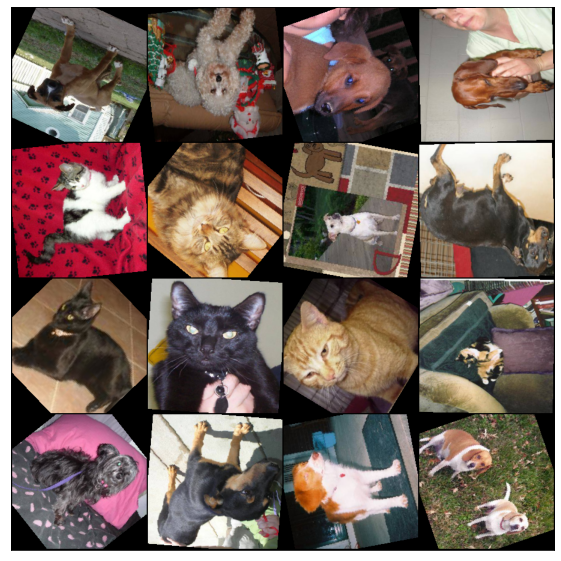

In [ ]:
from torchvision.utils import make_grid

for images, labels in train_dataloader:
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    break

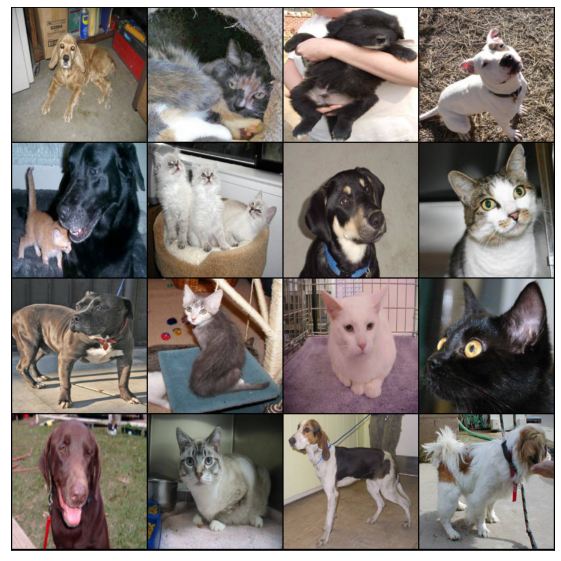

In [ ]:
from torchvision.utils import make_grid

for images, labels in val_dataloader:
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    break

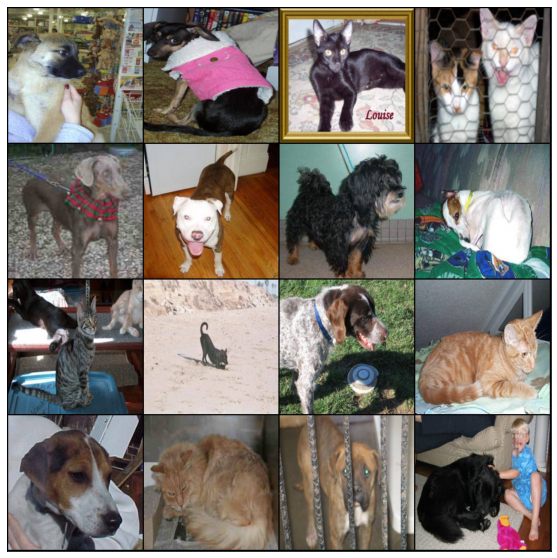

In [18]:
from torchvision.utils import make_grid

for images, labels in test_dataloader:
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    break

In [19]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [20]:
#define accuracy function

def accuracy(preds,gt): #gt is groundtruth
    #converting float preds to 0 and 1 based on a given threshold - 0.5
    threshold=0.5
    preds = [1 if preds[i]>=threshold else 0 for i in range(len(preds))]
    #calculate accuracy by comparing pred with gt
    acc = [1 if preds[i]==gt[i] else 0 for i in range(len(preds))]
    #find total accuracy
    total_acc = np.sum(acc)/len(preds)
    return total_acc*100

In [21]:
#define function that trains 1 epoch
import time as t
import torch
import torch.nn as nn
from tqdm import tqdm

def train_one_epoch(train_dataloader):
    epoch_loss=[]
    epoch_acc=[]
    start_time=t.time() #gets current time
    
    #iterate over the dataloader
    for images,labels in tqdm(train_dataloader):
        images=images.to(device)
        labels=labels.to(device)
        # [N, 1] - to match with preds shape
        labels = labels.reshape((labels.shape[0], 1)) 

        #reset gradients to zero
        optimizer.zero_grad()
        #forward pass
        preds=model(images)
        #calc loss
        loss=loss_fn(preds,labels)
        epoch_loss.append(loss.item())
        #calc acc
        acc = accuracy(preds,labels)
        epoch_acc.append(acc)
        #backward pass
        loss.backward() #calc gradients of loss function
        #update the weights of the model
        optimizer.step()
        
    #overall epoch results
    end_time=t.time() #gets current time
    time_taken=end_time-start_time
    epoch_loss=np.mean(epoch_loss)
    epoch_acc=np.mean(epoch_acc)
    #store results
    train_logs["loss"].append(epoch_loss)
    train_logs["accuracy"].append(epoch_acc)
    train_logs["time"].append(time_taken)
    
    return epoch_loss,epoch_acc,time_taken


#doesnt need any resetting of gradients or updates of weights, nth to do for optimizer
def val_one_epoch(val_dataloader,best_val_acc):
    epoch_loss=[]
    epoch_acc=[]
    start_time=t.time()
    
    for images,labels in tqdm(val_dataloader):
        images=images.to(device)
        labels=labels.to(device)        
        labels=labels.reshape((labels.shape[0],1))
        
        #forward pass
        preds=model(images)
        #calc loss
        loss=loss_fn(preds,labels)
        epoch_loss.append(loss.item())
        #calc acc
        acc=accuracy(preds,labels)
        epoch_acc.append(acc)
        
    #overall epoch results
    end_time=t.time()
    time_taken=end_time-start_time
    epoch_loss=np.mean(epoch_loss)
    epoch_acc=np.mean(epoch_acc)
    #store results
    val_logs["loss"].append(epoch_loss)
    val_logs["accuracy"].append(epoch_acc)
    val_logs["time"].append(time_taken)
    
    #save model with best val_acc
    if epoch_acc>best_val_acc:
        best_val_acc=epoch_acc
        torch.save(model.state_dict(),"best_model.pth")
    
    return epoch_loss,epoch_acc,time_taken,best_val_acc

In [ ]:
# import ssl #usually required when you have to download pretrained model and weights
# ssl._create_default_https_context = ssl._create_unverified_context

# from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import resnet50

model = resnet50(pretrained=True)
#change the last layer
output_num_values=1 #binary classification but the output_num_values is 1 since 1 probability value is output only
#sigmoid is 1 output value only
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features,output_num_values,bias=True),
    nn.Sigmoid()
)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learning_rate=0.0001
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
lr_scheduler=torch.optim.lr_scheduler.StepLR(optimizer,step_size=5,gamma=0.5)

loss_fn=nn.BCELoss()
train_logs={"loss":[],"accuracy":[],"time":[]}
val_logs={"loss":[],"accuracy":[],"time":[]}

model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
batch_size=64
percentage_data=.3

train_dataset=CatsDogsDataset(train_paths[:int(len(train_paths)*percentage_data)],mode="train",train_transforms=get_train_transform())
val_dataset=CatsDogsDataset(val_paths[:int(len(val_paths)*percentage_data)],mode="val",val_test_transforms=get_val_test_transforms())
train_dataloader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True,drop_last=True)
val_dataloader=DataLoader(val_dataset,batch_size=batch_size,shuffle=True,drop_last=True)

best_val_acc=0 #initialise at 0 first
num_epochs=3
for epoch in range(num_epochs):
    #training
    print("\nEpoch {}".format(epoch+1))
    loss,acc,time=train_one_epoch(train_dataloader)
    print("\nTraining")
    print("Loss: {} Acc:{} Time taken: {}".format(loss,acc,time))
    loss,acc,time,best_val_acc=val_one_epoch(val_dataloader,best_val_acc)
    print("\nValidation")
    print("Loss: {} Acc:{} Time taken: {}".format(loss,acc,time))


Epoch 1


100%|██████████| 81/81 [01:29<00:00,  1.11s/it]



Training
Loss: 0.17508495244898914 Acc:92.95910493827161 Time taken: 89.54533648490906


100%|██████████| 23/23 [00:16<00:00,  1.43it/s]



Validation
Loss: 0.0635405714907076 Acc:97.96195652173913 Time taken: 16.110507011413574

Epoch 2


100%|██████████| 81/81 [01:26<00:00,  1.07s/it]



Training
Loss: 0.08640491320855087 Acc:96.54706790123457 Time taken: 86.35768270492554


100%|██████████| 23/23 [00:14<00:00,  1.60it/s]



Validation
Loss: 0.05247175134718418 Acc:98.09782608695652 Time taken: 14.419183492660522

Epoch 3


100%|██████████| 81/81 [01:26<00:00,  1.06s/it]



Training
Loss: 0.07082573053093603 Acc:97.10648148148148 Time taken: 86.05320358276367


100%|██████████| 23/23 [00:14<00:00,  1.57it/s]


Validation
Loss: 0.058347638939385826 Acc:97.82608695652173 Time taken: 14.659210205078125


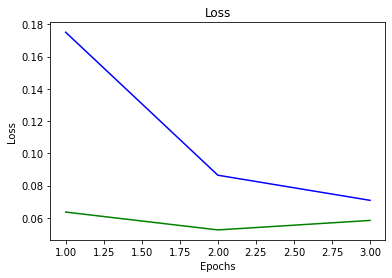

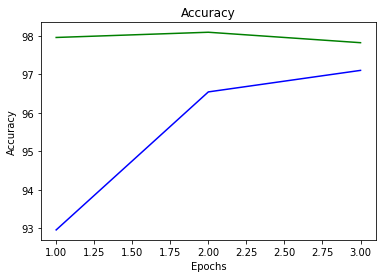

In [ ]:
### Plotting Results

#Loss
plt.title("Loss")
plt.plot(np.arange(1, num_epochs+1, 1), train_logs["loss"], color = 'blue')
plt.plot(np.arange(1, num_epochs+1, 1), val_logs["loss"], color = 'green')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

#Accuracy
plt.title("Accuracy")
plt.plot(np.arange(1, num_epochs+1, 1), train_logs["accuracy"], color = 'blue')
plt.plot(np.arange(1, num_epochs+1, 1), val_logs["accuracy"], color = 'green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

## load trained model, predict on test images, summarise the statistics and plot examples of images wrong or correctly labelled 

In [22]:
batch_size=64
percentage_data=.3

train_dataset=CatsDogsDataset(train_paths[:int(len(train_paths)*percentage_data)],mode="train",train_transforms=get_train_transform())
val_dataset=CatsDogsDataset(val_paths[:int(len(val_paths)*percentage_data)],mode="val",val_test_transforms=get_val_test_transforms())
train_dataloader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True,drop_last=True)
val_dataloader=DataLoader(val_dataset,batch_size=batch_size,shuffle=True,drop_last=True)

load trained model

In [30]:
PATH="/content/drive/MyDrive/Colab_Notebooks/pytorch_learning/best_model.pth"

from torchvision.models import resnet50

model = resnet50(pretrained=True)
#change the last layer
output_num_values=1 #binary classification but the output_num_values is 1 since 1 probability value is output only
#sigmoid is 1 output value only
model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features,output_num_values,bias=True),
    nn.Sigmoid()
)

model.load_state_dict(torch.load(PATH))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [64]:
model.to(device)

all_preds=[]

for images,labels in test_dataloader:
  images=images.to(device)
  labels=labels.to(device)
  labels=labels.reshape((labels.shape[0],1))
  preds=model(images)
  preds_list=preds.tolist()
  preds_list=[x[0] for x in preds_list]
  pred_labels = [0 if x<0.5 else 1 for x in preds_list]
  for pred in pred_labels:
    all_preds.append(pred)
  
pred_labels

[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]

In [77]:
from tqdm import tqdm
all_labels=[]

for images,labels in tqdm(test_dataloader):
  labels_list=labels.tolist()
  for label in labels_list:
    all_labels.append(label)

100%|██████████| 155/155 [00:18<00:00,  8.46it/s]


In [78]:
len(all_preds),len(all_labels)

(2480, 2480)

In [79]:
all_preds[:5],all_labels[:5]

([0, 0, 0, 0, 1], [0.0, 1.0, 1.0, 0.0, 1.0])

In [83]:
num_correct=0

for pred,label in zip(all_preds,all_labels):
  if int(pred)==int(label):
    num_correct+=1

print("{} images labelled correctly out of {} test images".format(num_correct,len(all_labels)))
print("accuracy: {}".format(num_correct/len(all_labels)))

1193 images labelled correctly out of 2480 test images
accuracy: 0.48104838709677417


In [84]:
print("THE END")

THE END
